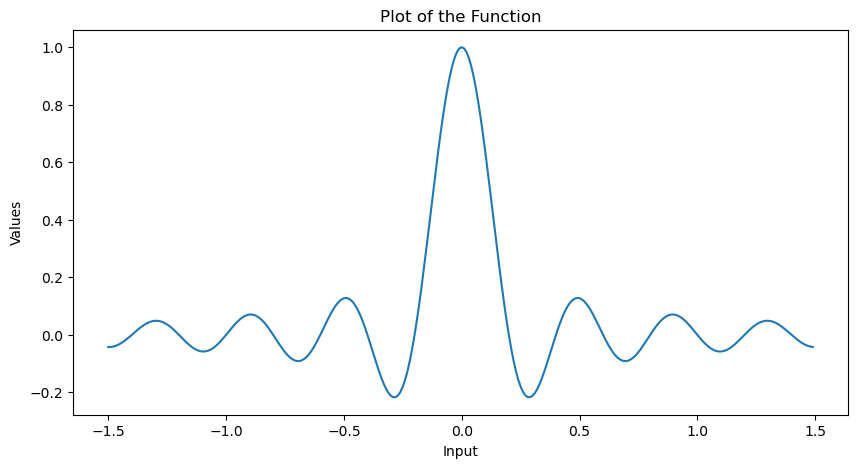

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torchvision.transforms as T
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title('Plot of the Function')
plt.xlabel('Input')
plt.ylabel('Values')
plt.show()

In [6]:
def train_model(model, x, y, optimizer, loss_fn, max_epochs=20000, print_every=500, tol=1e-5, label=""):
    epoch_log, loss_log = [], []
    converged = False

    for epoch in range(1, max_epochs + 1):
        # Forward pass
        preds = model(x)
        loss = loss_fn(preds, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track results
        epoch_log.append(epoch)
        loss_log.append(loss.item())

        # Print progress for every N epochs
        if epoch % print_every == 0:
            print(f"{label} Epoch {epoch}: Loss = {loss.item():.6f}")
            
        # Convergence check
        if epoch > 5 and loss.item() < 0.001:
            if (abs(loss_log[-1] - loss_log[-2]) < tol and
                abs(loss_log[-2] - loss_log[-3]) < tol):
                print(f"{label} Converged at epoch {epoch}, final loss = {loss.item():.6f}")
                converged = True
                break

    if not converged:
        print(f"{label} Max epochs ({max_epochs}) reached without full convergence")

    return epoch_log, loss_log, preds.detach()

In [7]:
# Define model1 layers
alt_layers_1 = [
    nn.Linear(1, 1), nn.ReLU(),
    nn.Linear(1, 190), nn.ReLU(),
    nn.Linear(190, 1)
]

In [8]:
# Define model2 layers
alt_layers_2 = [
    nn.Linear(1, 1), nn.ReLU(),
    nn.Linear(1, 10), nn.ReLU(),
    nn.Linear(10, 18), nn.ReLU(),
    nn.Linear(18, 15), nn.ReLU(),
    nn.Linear(15, 4), nn.ReLU(),
    nn.Linear(4, 1)
]

In [9]:
# Define model3 layers
alt_layers_3 = [
    nn.Linear(1, 1), nn.ReLU(),
    nn.Linear(1, 5), nn.ReLU(),
    nn.Linear(5, 10), nn.ReLU(),
    nn.Linear(10, 10), nn.ReLU(),
    nn.Linear(10, 10), nn.ReLU(),
    nn.Linear(10, 10), nn.ReLU(),
    nn.Linear(10, 4), nn.ReLU(),
    nn.Linear(4, 1)
]

In [10]:
# ==== Create model instances ====
model_1 = nn.Sequential(*alt_layers_1)
model_2 = nn.Sequential(*alt_layers_2)
model_3 = nn.Sequential(*alt_layers_3)

# ==== Training setup ====
optimizer_1 = optim.RMSprop(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
optimizer_2 = optim.RMSprop(model_2.parameters(), lr=1e-3, weight_decay=1e-4)
optimizer_3 = optim.RMSprop(model_3.parameters(), lr=1e-3, weight_decay=1e-4)

loss_func = nn.MSELoss()

# ==== Train all models together ====
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_1, x, y, optimizer_1, loss_func, label="Model 1")
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_2, x, y, optimizer_2, loss_func, label="Model 2")
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_3, x, y, optimizer_3, loss_func, label="Model 3")

Model 1 Epoch 500: Loss = 0.010409
Model 1 Epoch 1000: Loss = 0.006946
Model 1 Epoch 1500: Loss = 0.006275
Model 1 Epoch 2000: Loss = 0.005908
Model 1 Epoch 2500: Loss = 0.005675
Model 1 Epoch 3000: Loss = 0.005509
Model 1 Epoch 3500: Loss = 0.005364
Model 1 Epoch 4000: Loss = 0.005247
Model 1 Epoch 4500: Loss = 0.005142
Model 1 Epoch 5000: Loss = 0.005050
Model 1 Epoch 5500: Loss = 0.004973
Model 1 Epoch 6000: Loss = 0.004902
Model 1 Epoch 6500: Loss = 0.004836
Model 1 Epoch 7000: Loss = 0.004770
Model 1 Epoch 7500: Loss = 0.004715
Model 1 Epoch 8000: Loss = 0.004663
Model 1 Epoch 8500: Loss = 0.004616
Model 1 Epoch 9000: Loss = 0.004567
Model 1 Epoch 9500: Loss = 0.004517
Model 1 Epoch 10000: Loss = 0.004471
Model 1 Epoch 10500: Loss = 0.004432
Model 1 Epoch 11000: Loss = 0.004393
Model 1 Epoch 11500: Loss = 0.004360
Model 1 Epoch 12000: Loss = 0.004325
Model 1 Epoch 12500: Loss = 0.004292
Model 1 Epoch 13000: Loss = 0.004259
Model 1 Epoch 13500: Loss = 0.004228
Model 1 Epoch 14000: 

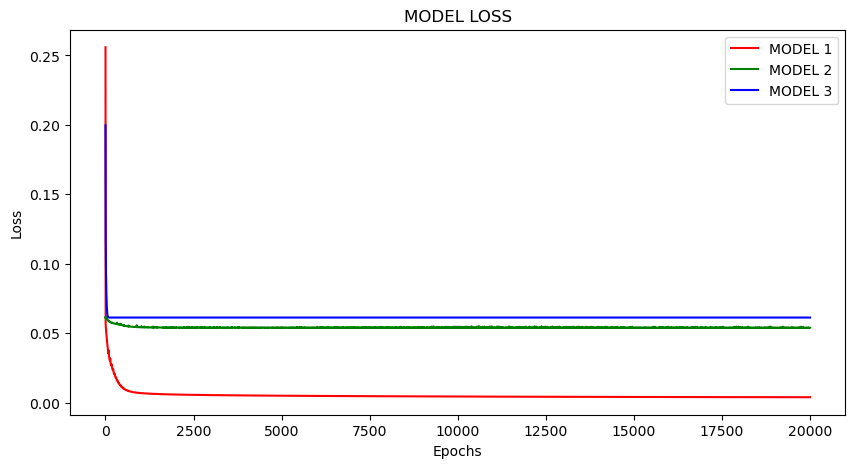

In [11]:
plt.figure(figsize=(10,5))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "red", label ="MODEL 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "green", label ="MODEL 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "blue", label ="MODEL 3")
plt.title('MODEL LOSS')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

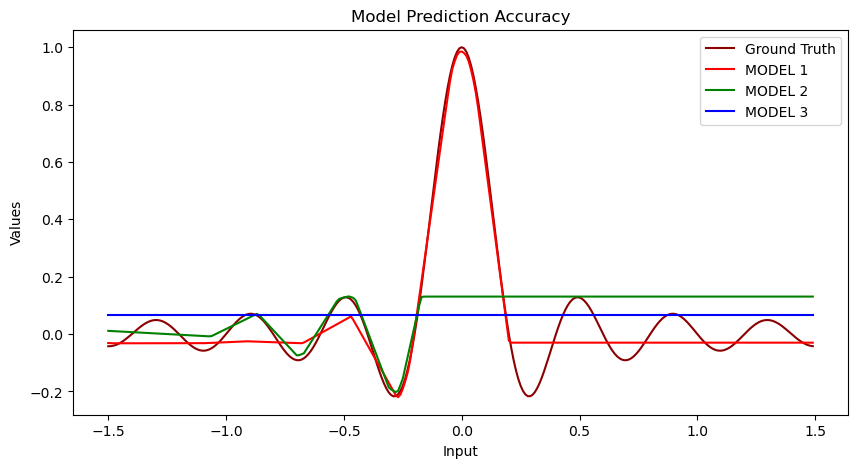

In [12]:
plt.figure(figsize=(10,5))
plt.plot(x, y, color="darkred", label = 'Ground Truth')
plt.plot(x, m1_prediction.data, color="red", label = 'MODEL 1')
plt.plot(x, m2_prediction.data, color="green", label = 'MODEL 2')
plt.plot(x, m3_prediction.data, color="blue", label = 'MODEL 3')
plt.title('Model Prediction Accuracy')
plt.xlabel('Input')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()

/local_scratch/slurm.5423973/ipykernel_3265885/3978192403.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)


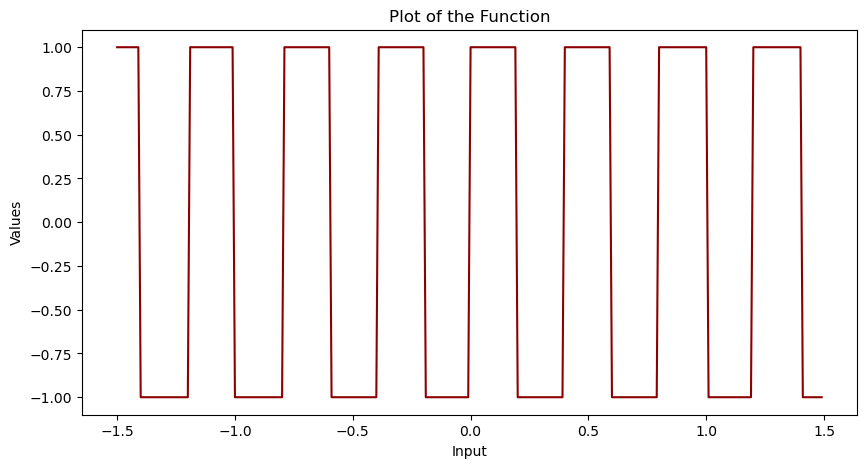

In [13]:
x2 = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y2 = np.sign(np.sin(5*np.pi*x))
x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)
plt.figure(figsize=(10,5))
plt.plot(x2, y2, color = "darkred")
plt.title('Plot of the Function')
plt.xlabel('Input')
plt.ylabel('Values')
plt.show()

In [14]:
# ==== Create model instances ====
model_1 = nn.Sequential(*alt_layers_1)
model_2 = nn.Sequential(*alt_layers_2)
model_3 = nn.Sequential(*alt_layers_3)

# ==== Training setup ====
optimizer_1 = optim.RMSprop(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
optimizer_2 = optim.RMSprop(model_2.parameters(), lr=1e-3, weight_decay=1e-4)
optimizer_3 = optim.RMSprop(model_3.parameters(), lr=1e-3, weight_decay=1e-4)

loss_func = nn.MSELoss()

# ==== Train all models together ====
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_1, x2, y2, optimizer_1, loss_func, label="Model 1")
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_2, x2, y2, optimizer_2, loss_func, label="Model 2")
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_3, x2, y2, optimizer_3, loss_func, label="Model 3")

Model 1 Epoch 500: Loss = 0.901700
Model 1 Epoch 1000: Loss = 0.884458
Model 1 Epoch 1500: Loss = 0.872926
Model 1 Epoch 2000: Loss = 0.864607
Model 1 Epoch 2500: Loss = 0.858053
Model 1 Epoch 3000: Loss = 0.852320
Model 1 Epoch 3500: Loss = 0.847555
Model 1 Epoch 4000: Loss = 0.843564
Model 1 Epoch 4500: Loss = 0.839921
Model 1 Epoch 5000: Loss = 0.837373
Model 1 Epoch 5500: Loss = 0.834197
Model 1 Epoch 6000: Loss = 0.831725
Model 1 Epoch 6500: Loss = 0.829538
Model 1 Epoch 7000: Loss = 0.827585
Model 1 Epoch 7500: Loss = 0.825654
Model 1 Epoch 8000: Loss = 0.823870
Model 1 Epoch 8500: Loss = 0.822246
Model 1 Epoch 9000: Loss = 0.820546
Model 1 Epoch 9500: Loss = 0.818811
Model 1 Epoch 10000: Loss = 0.817108
Model 1 Epoch 10500: Loss = 0.814704
Model 1 Epoch 11000: Loss = 0.812774
Model 1 Epoch 11500: Loss = 0.810737
Model 1 Epoch 12000: Loss = 0.808218
Model 1 Epoch 12500: Loss = 0.807395
Model 1 Epoch 13000: Loss = 0.807377
Model 1 Epoch 13500: Loss = 0.801247
Model 1 Epoch 14000: 

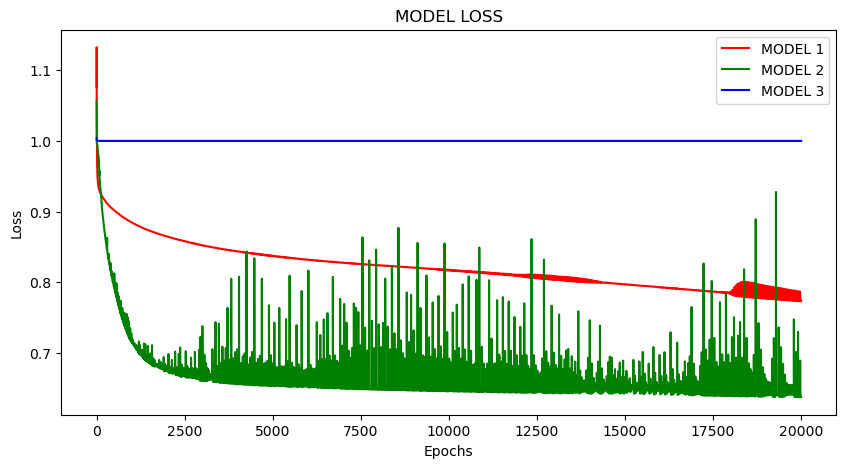

In [15]:
plt.figure(figsize=(10,5))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "red", label = "MODEL 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "green", label = "MODEL 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "blue", label = "MODEL 3")
plt.title('MODEL LOSS')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

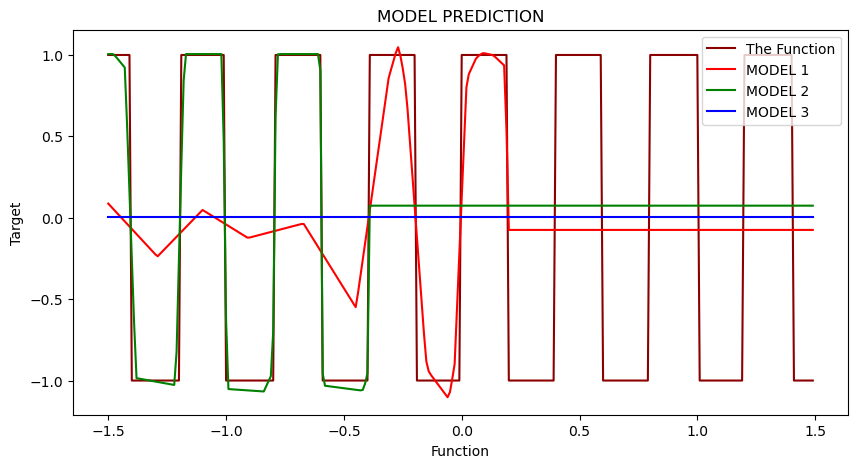

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(x2, y2, color="darkred", label='The Function')
plt.plot(x2, m1_prediction.data, color="red", label='MODEL 1')
plt.plot(x2, m2_prediction.data, color="green", label='MODEL 2')
plt.plot(x2, m3_prediction.data, color="blue", label='MODEL 3')
plt.title('MODEL PREDICTION')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Load and preprocess MNIST dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=100, shuffle=False)

def get_data(train_size, test_size):
    train_data = torch.utils.data.DataLoader(dataset=train_set, batch_size=train_size, shuffle=True)
    test_data = torch.utils.data.DataLoader(dataset=test_set, batch_size=test_size, shuffle=True)
    return (train_data, test_data)

In [18]:
class CNN_model1(nn.Module):
    def __init__(self):
        super(CNN_model1, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(1, 16, 5, 1, 2),                              
            nn.ReLU(),                      
            nn.MaxPool2d(2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.fc = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)       
        x = self.fc(x)
        return x

In [23]:
class CNN_model2(nn.Module):
    def __init__(self):
        super(CNN_model2, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(1, 6, 5, 1, 2),                              
            nn.ReLU(),                      
            nn.MaxPool2d(2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(6, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.conv3 = nn.Sequential(         
            nn.Conv2d(32, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.fc = nn.Linear(32*3*3, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)       
        x = self.fc(x)
        return x

In [24]:
class CNN_model3(nn.Module):
    def __init__(self):
        super(CNN_model3, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(1, 64, 5, 1, 2),                              
            nn.ReLU(),                      
            nn.MaxPool2d(2),    
        )
        self.fc = nn.Linear(64 * 14 * 14, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)       
        x = self.fc(x)
        return x

In [25]:
def train_model(model, train_loader, loss_fn, device, epochs=30, lr=0.001):    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.to(device)
    model.train()
    loss_list = []
    acc_list = []

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for batch_idx, (x, y) in enumerate(train_loader):
            x, y = x.to(device), y.to(device)

            # forward
            outputs = model(x)
            loss = loss_fn(outputs, y)

            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # metrics
            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

        avg_loss = total_loss / len(train_loader)
        accuracy = correct / total

        loss_list.append(avg_loss)
        acc_list.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {accuracy*100:.2f}%")

    return loss_list, acc_list

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.CrossEntropyLoss()

print("\nTraining CNN_model1:")
loss1, acc1 = train_model(CNN_model1(), train_loader, loss_fn, device, epochs=5)

print("\nTraining CNN_model2:")
loss2, acc2 = train_model(CNN_model2(), train_loader, loss_fn, device, epochs=5)

print("\nTraining CNN_model3:")
loss3, acc3 = train_model(CNN_model3(), train_loader, loss_fn, device, epochs=5)


Training CNN_model1:
Epoch 1/5 | Loss: 0.6389 | Accuracy: 83.22%
Epoch 2/5 | Loss: 0.1448 | Accuracy: 95.82%
Epoch 3/5 | Loss: 0.0937 | Accuracy: 97.24%
Epoch 4/5 | Loss: 0.0743 | Accuracy: 97.81%
Epoch 5/5 | Loss: 0.0608 | Accuracy: 98.17%

Training CNN_model2:
Epoch 1/5 | Loss: 0.8431 | Accuracy: 77.71%
Epoch 2/5 | Loss: 0.2165 | Accuracy: 93.53%
Epoch 3/5 | Loss: 0.1349 | Accuracy: 95.89%
Epoch 4/5 | Loss: 0.1005 | Accuracy: 96.97%
Epoch 5/5 | Loss: 0.0824 | Accuracy: 97.48%

Training CNN_model3:
Epoch 1/5 | Loss: 0.4228 | Accuracy: 88.00%
Epoch 2/5 | Loss: 0.1335 | Accuracy: 96.30%
Epoch 3/5 | Loss: 0.0851 | Accuracy: 97.64%
Epoch 4/5 | Loss: 0.0633 | Accuracy: 98.24%
Epoch 5/5 | Loss: 0.0524 | Accuracy: 98.56%


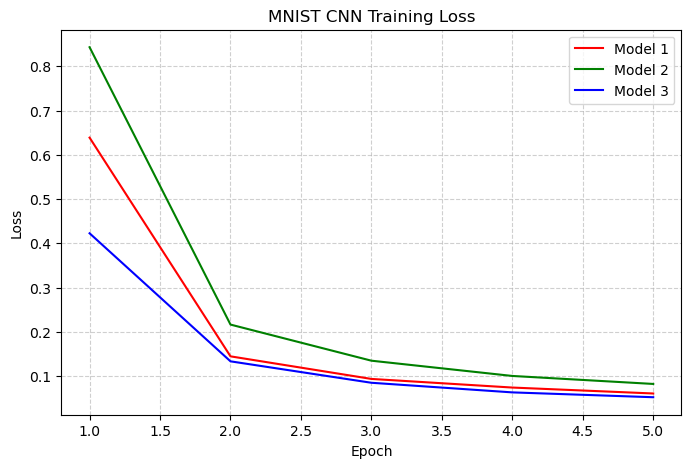

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(loss1)+1), loss1, 'r-', label="Model 1")
plt.plot(range(1, len(loss2)+1), loss2, 'g-', label="Model 2")
plt.plot(range(1, len(loss3)+1), loss3, 'b-', label="Model 3")
plt.title("MNIST CNN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

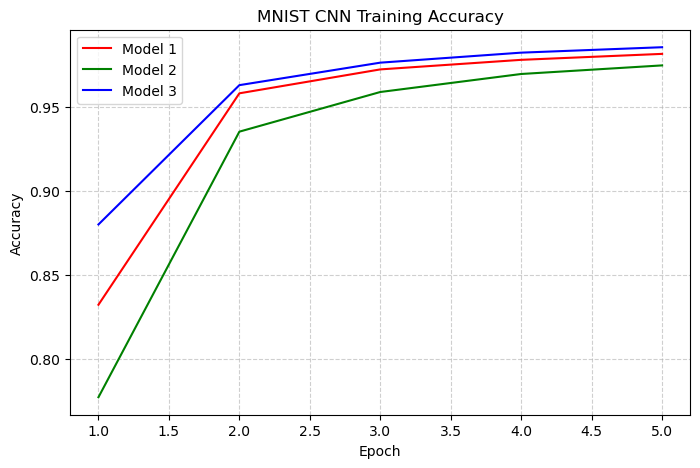

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(acc1)+1), acc1, 'r-', label="Model 1")
plt.plot(range(1, len(acc2)+1), acc2, 'g-', label="Model 2")
plt.plot(range(1, len(acc3)+1), acc3, 'b-', label="Model 3")
plt.title("MNIST CNN Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()